In [13]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [23]:
df = pd.read_csv('leads.csv')
df.head()

,customer_id,age,job,marital,income,visits,active_visits,purchases,dollars,unsubscribe
0,1001,58,management,married,high,0,0,0,0.0,0
1,1002,44,technician,single,low,0,0,0,0.0,0
2,1003,33,entrepreneur,married,low,0,0,0,0.0,0
3,1004,47,blue-collar,married,high,0,0,0,0.0,0
4,1005,33,unknown,single,low,0,0,0,0.0,0


In [26]:
marital_group = df.groupby(['marital']).sum()['dollars']
print(marital_group)

marital
divorced     18243.39
married     110189.41
single       84531.30
Name: dollars, dtype: float64


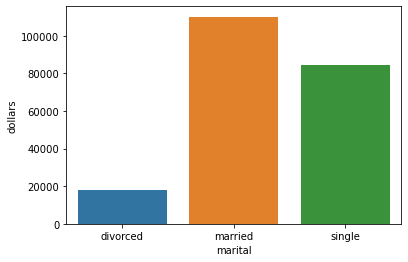

In [25]:
chart = sns.barplot(x='marital', y='dollars', data=marital_group.reset_index())
plt.show()

In [5]:
df.columns

Index(['customer_id', 'age', 'job', 'marital', 'income', 'visits',
       'active_visits', 'purchases', 'dollars', 'unsubscribe'],
      dtype='object')

In [27]:
job_group = df.groupby(['job']).sum()['dollars']
group = df.groupby(['job']).count()['customer_id']
print(group)

job
admin.           5171
blue-collar      9732
domestic         1240
entrepreneur     1487
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: customer_id, dtype: int64


In [8]:
average_revenue_per_group = np.average(job_group, axis=0, weights=group['customer_id'])
# this is a weighted average because there are 
# a different number of people in each job group

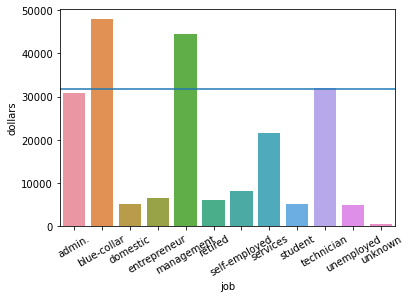

In [15]:
chart = sns.barplot(x='job', y='dollars', data=job_group.reset_index())
chart.axhline(average_revenue_per_group)
chart.set_xticklabels(chart.get_xticklabels(),rotation = 30)

plt.show()

In [11]:
df_heat = df.pivot_table(index="income", columns= "marital", values= "dollars", aggfunc='sum')

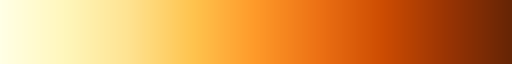

In [18]:
sns.color_palette("YlOrBr", as_cmap=True)


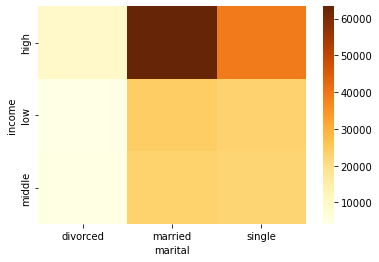

In [22]:
sns.heatmap(df_heat, cmap="YlOrBr")
plt.show()